In [1]:
import kagglehub
vasukipatel_face_recognition_dataset_path = kagglehub.dataset_download('vasukipatel/face-recognition-dataset')

print('Data source import complete.')

100%|██████████| 726M/726M [00:09<00:00, 77.5MB/s]

Extracting files...


Data source import complete.


In [5]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
df = pd.read_csv(os.path.join(vasukipatel_face_recognition_dataset_path, "Dataset.csv"))
df.head()

,id,label
0,Robert Downey Jr_87.jpg,Robert Downey Jr
1,Lisa Kudrow_64.jpg,Lisa Kudrow
2,Ellen Degeneres_34.jpg,Ellen Degeneres
3,Billie Eilish_3.jpg,Billie Eilish
4,Hrithik Roshan_35.jpg,Hrithik Roshan


In [7]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import img_to_array

In [19]:
IMG_SIZE = 100
FACES_DIR = os.path.join(vasukipatel_face_recognition_dataset_path, "Faces", "Faces")
TARGET_PERSON = "Tom Cruise"

In [20]:

def load_faces(face_dir, target_person):
    data = []
    for fname in os.listdir(face_dir):
        if not fname.lower().endswith(".jpg"):
            continue
        label_name = fname.rsplit("_", 1)[0]
        label = 1 if label_name == target_person else 0
        img_path = os.path.join(face_dir, fname)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img_to_array(img) / 255.0
            data.append([img, label])
        except Exception as e:
            continue
    return data

In [21]:
print("📦 Loading cropped face images...")
data = load_faces(FACES_DIR, TARGET_PERSON)
print(f"✅ Loaded {len(data)} face images.")

📦 Loading cropped face images...
✅ Loaded 2562 face images.


In [22]:

X, y = zip(*data)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,352,641 (16.60 MB)

 Trainable params: 4,352,641 (16.60 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
print("🚀 Training CNN model...")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"🎯 Test Accuracy: {accuracy:.2f}")

🚀 Training CNN model...
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 34s 493ms/step - accuracy: 0.9685 - loss: 0.2374 - val_accuracy: 0.9786 - val_loss: 0.1079
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 40s 482ms/step - accuracy: 0.9739 - loss: 0.1399 - val_accuracy: 0.9786 - val_loss: 0.0977
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 44s 528ms/step - accuracy: 0.9749 - loss: 0.1119 - val_accuracy: 0.9786 - val_loss: 0.1277
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 40s 518ms/step - accuracy: 0.9740 - loss: 0.1144 - val_accuracy: 0.9786 - val_loss: 0.0762
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 31s 481ms/step - accuracy: 0.9751 - loss: 0.0833 - val_accuracy: 0.9786 - val_loss: 0.0647
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 40s 475ms/step - accuracy: 0.9800 - loss: 0.0609 - val_accuracy: 0.9786 - val_loss: 0.0617
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 33s 514ms/step - accuracy: 0.9790 - loss: 0.0589 - val_accuracy: 0.9786 - val_loss: 0.0575
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 42s 529ms/step - accuracy: 0.9738 -

In [25]:

def show_random_prediction():
    idx = random.randint(0, len(X_test) - 1)
    sample = X_test[idx]
    actual = y_test[idx]
    pred = model.predict(np.expand_dims(sample, axis=0))[0][0]
    label = "Tom Cruise" if pred > 0.5 else "Not Tom Cruise"

    plt.imshow(sample.reshape(IMG_SIZE, IMG_SIZE), cmap="gray")
    plt.title(f"Predicted: {label} ({pred:.2f}) | Actual: {'Tom Cruise' if actual==1 else 'Other'}")
    plt.axis('off')
    plt.show()

In [26]:
import random


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


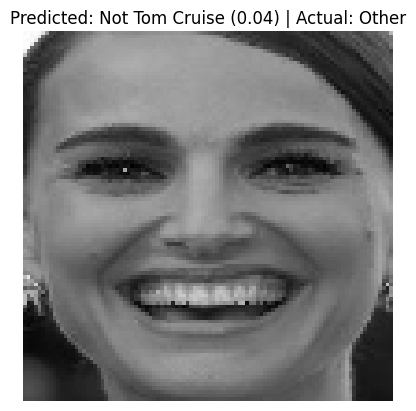

In [27]:

show_random_prediction()